# Probability distribution problems

## Binomial distribution

In probability theory and statistics, the binomial distribution is the discrete probability distribution that gives only two possible results in an experiment, for example, when you flip a coin it can by either head or tails.

In [1]:
from scipy.stats import binom

# Define all the probability functions related to this distribution

def dbinom(x, size, prob = 0.5):
    """
    Calculates the point estimate of the binomial distribution
    """
    result = binom.pmf(k = x, n = size, p = prob, loc = 0)

    return result

def pbinom(q, size, prob = 0.5):
    """
    Calculates the cumulative of the binomial distribution
    """
    result = binom.cdf(k = q, n = size, p = prob, loc = 0)

    return result

def qbinom(p, size, prob = 0.5):
    """
    Calculates the quantile function from the binomial distribution
    """
    result = binom.ppf(q = p, n = size, p = prob, loc = 0)

    return result

def rbinom(n, size, prob = 0.5):
    """
    Generates random variables from the binomial distribution
    """
    result = binom.rvs(n = size, p = prob, size = n)

    return result

In [4]:
# Binomial(10, 0.2) distribution where n = 10 is the number of trials and p = 0.2 is the probability of success in a single trial.
import numpy as np
np.random.seed(42)

print(f"Probability that a Binomial(10, 0.2) takes the value 2: {dbinom(2, size = 10, prob = 0.2)}")
print(f"Probability that a Binomial(10, 0.2) will take a value less than 2: {pbinom(2, size = 10, prob = 0.2)}")
print(f"Which value of a Binomial(10, 0.2) has a cumulative probability of 0.9? {qbinom(0.9, size = 10, prob = 0.2)}")
print(f"Generate 2000 random values from a Binomial(10, 0.2) distribution: {rbinom(2000, size = 10, prob = 0.2)}")

Probability that a Binomial(10, 0.2) takes the value 2: 0.30198988800000004
Probability that a Binomial(10, 0.2) will take a value less than 2: 0.6777995263999999
Which value of a Binomial(10, 0.2) has a cumulative probability of 0.9? 4.0
Generate 2000 random values from a Binomial(10, 0.2) distribution: [1 4 3 ... 0 0 1]


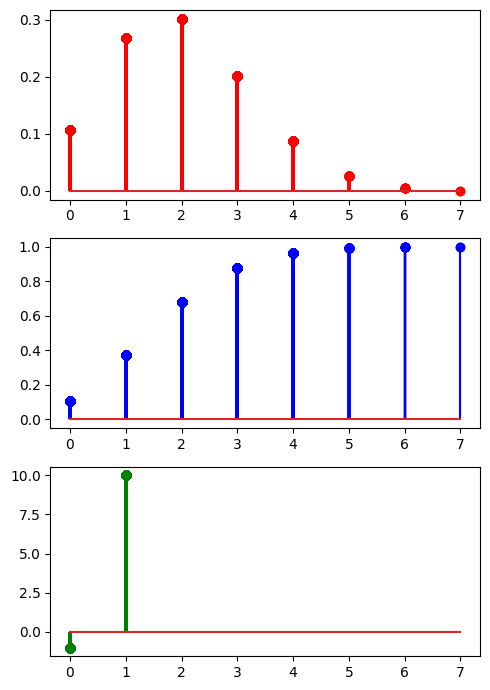

In [5]:
import matplotlib.pyplot as plt

np.random.seed(42)

size = 10
prob = 0.2
data = rbinom(2000, size = 10, prob = 0.2)

pmf = dbinom(data, size = size, prob = prob)
cdf = pbinom(data, size = size, prob = prob)
ppf = qbinom(data, size = size, prob = prob)

fig, axis = plt.subplots(3, 1, figsize = (5, 7))

axis[0].stem(data, pmf, "r-")
axis[1].stem(data, cdf, "b-")
axis[2].stem(data, ppf, "g-")

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

## Exercise 1

Write the above functions but for both normal and uniform distributions.

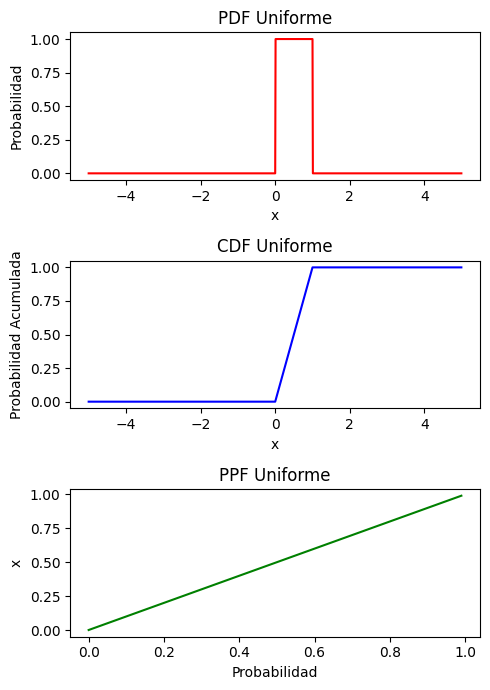

In [9]:
from scipy.stats import uniform
import numpy as np
import matplotlib.pyplot as plt

def dunif(x, low=0, high=1):
    """
    Calcula la estimación puntual de la distribución uniforme
    
    Parámetros:
    - x: Valor para el cual se desea conocer la densidad de probabilidad
    - low: Límite inferior de la distribución uniforme
    - high: Límite superior de la distribución uniforme
    """
    return uniform.pdf(x, loc=low, scale=high-low)

def punif(q, low=0, high=1):
    """
    Calcula la función de distribución acumulativa de la distribución uniforme
    
    Parámetros:
    - q: Cuantil para el cual se desea conocer la probabilidad acumulada
    - low: Límite inferior de la distribución uniforme
    - high: Límite superior de la distribución uniforme
    """
    return uniform.cdf(q, loc=low, scale=high-low)

def qunif(p, low=0, high=1):
    """
    Calcula la función cuantil de la distribución uniforme
    
    Parámetros:
    - p: Probabilidad para la cual se desea conocer el cuantil correspondiente
    - low: Límite inferior de la distribución uniforme
    - high: Límite superior de la distribución uniforme
    """
    return uniform.ppf(p, loc=low, scale=high-low)

def runif(n, low=0, high=1):
    """
    Genera variables aleatorias de una distribución uniforme
    
    Parámetros:
    - n: Número de observaciones que se desean generar
    - low: Límite inferior de la distribución uniforme
    - high: Límite superior de la distribución uniforme
    """
    return uniform.rvs(size=n, loc=low, scale=high-low)

# Crear datos y parámetros
np.random.seed(42)  # Semilla para reproducibilidad
low = 0  # Límite inferior
high = 1  # Límite superior
data = np.arange(-5, 5, 0.01)  # Datos para evaluación de funciones

# Obtener valores de las funciones para los datos generados
pmf = dunif(data, low = low, high = high)
cdf = punif(data, low = low, high = high)
ppf = np.arange(0, 1, 0.01)  # PPF acepta probabilidades como entrada, por lo que data debe estar entre [0, 1]

# Crear subplots
fig, axis = plt.subplots(3, 1, figsize = (5, 7))

# Plotear PDF, CDF y PPF de la distribución uniforme
axis[0].plot(data, pmf, "r-")
axis[0].set_title("PDF Uniforme")
axis[0].set_ylabel("Probabilidad")
axis[0].set_xlabel("x")

axis[1].plot(data, cdf, "b-")
axis[1].set_title("CDF Uniforme")
axis[1].set_ylabel("Probabilidad Acumulada")
axis[1].set_xlabel("x")

axis[2].plot(ppf, qunif(ppf, low = low, high = high), "g-")
axis[2].set_title("PPF Uniforme")
axis[2].set_ylabel("x")
axis[2].set_xlabel("Probabilidad")

# Ajustar layout y mostrar plot
plt.tight_layout()
plt.show()